In [ ]:
#실습예제 1 titanic
#실습예제 2 admission 대학교 입학 성적


In [3]:
#1 titanic
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#1. dataloading

data=pd.read_csv("./data/titanic/titanic_data.csv" , sep=",") #sep 는 csv가 ,로 구분되어있어서 defalt 값??
       

data_x = data[["Sex","Age","Pclass","Fare"]]
data_y = data["Survived"]
# data_x 전처리 -> male female 숫자로 ,  pclass 123 가중치가 3이 높고 좋은데 1이 좋은거라 바꿔줌, fare의 크기가 들쭉날쭉




pclass_dummies = pd.get_dummies(data_x["Pclass"],prefix="Pclass") #원래 갖고있던 값이 열이름 숫자로 감  


data_x= data_x.join(pclass_dummies)

data_x.drop("Pclass", axis=1 , inplace=True )

sex_dummies = pd.get_dummies(data_x["Sex"],prefix="Sex")

data_x= data_x.join(sex_dummies)

data_x.drop("Sex", axis=1 , inplace=True )

print(data_x)
print("===========")
x_data = MinMaxScaler().fit_transform(data_x.values)
y_data = data_y.values.reshape(-1,1) #2차원형태로 만듬
print(x_data)

X=tf.placeholder(shape=[None,7],dtype=tf.float32)
Y=tf.placeholder(shape=[None,1],dtype=tf.float32)


#weight 와 bias

W=tf.Variable(tf.random_normal([7,1]),name="weight" )  
b=tf.Variable(tf.random_normal([1]) , name="bias") #덧셈이라 하나만 있어도 되는거 아닌가?

#hypothesis

logit = tf.matmul(X,W)+b

H=tf.sigmoid(logit)


cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit , labels = Y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)


sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습

for step in range(20000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data , Y:y_data})
    
    if step%2000==0 :
        print("cost:{}".format(cost_val))

        
        
predict = tf.cast(H>0.5 ,dtype=tf.float32) 
correct = tf.equal(predict,Y) 

accuracy = tf.reduce_mean(tf.cast(correct , dtype=tf.float32))


print("정확도 ={}".format(sess.run(accuracy ,feed_dict={X:x_data,Y:y_data} ) ))




      Age      Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male
0    22.0    7.2500         0         0         1           0         1
1    38.0   71.2833         1         0         0           1         0
2    26.0    7.9250         0         0         1           1         0
3    35.0   53.1000         1         0         0           1         0
4    35.0    8.0500         0         0         1           0         1
5    30.0    8.4583         0         0         1           0         1
6    54.0   51.8625         1         0         0           0         1
7     2.0   21.0750         0         0         1           0         1
8    27.0   11.1333         0         0         1           1         0
9    14.0   30.0708         0         1         0           1         0
10    4.0   16.7000         0         0         1           1         0
11   58.0   26.5500         1         0         0           1         0
12   20.0    8.0500         0         0         1           0   

In [16]:
#2 주어진 데이터의 70% 를 training 용으로 사용 나머지 30%를 test용으로 사용 


import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


data=pd.read_csv("./data/admission/admission.csv" , sep=",") #sep 는 csv가 ,로 구분되어있어서 defalt 값??
       


data_x = data[["gre","gpa","rank"]]
data_y = data["admit"]



pclass_dummies = pd.get_dummies(data_x["rank"],prefix="rank")

data_x= data_x.join(pclass_dummies)

data_x.drop("rank", axis=1 , inplace=True )

data_x1=data_x[0:int(len(data_x)/10*7)]
data_x2=data_x[int(len(data_x)/10*7):int(len(data_x))]

data_y1=data_y[0:int(len(data_y)/10*7)]
data_y2=data_y[int(len(data_y)/10*7):int(len(data_y))]

x_data = MinMaxScaler().fit_transform(data_x1.values)
x_data2 = MinMaxScaler().fit_transform(data_x2.values)
print(x_data)
print(data_x1)
print("============")
print(data_x2)


# print(x_data)
# print(x_data[0][4])
# #print(x_data[0,int(len(x_data)/10*7)])

y_data = data_y1.values.reshape(-1,1) #2차원형태로 만듬
y_data2 = data_y2.values.reshape(-1,1)

X=tf.placeholder(shape=[None,6],dtype=tf.float32)
Y=tf.placeholder(shape=[None,1],dtype=tf.float32)

W=tf.Variable(tf.random_normal([6,1]),name="weight" )  
b=tf.Variable(tf.random_normal([1]) , name="bias")

logit = tf.matmul(X,W)+b

H=tf.sigmoid(logit)



cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit , labels = Y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)


sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습

for step in range(20000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data , Y:y_data})
    
    if step%2000==0 :
        print("cost:{}".format(cost_val))



predict = tf.cast(H>0.5 ,dtype=tf.float32) 
correct = tf.equal(predict,Y) 

accuracy = tf.reduce_mean(tf.cast(correct , dtype=tf.float32))


print("정확도 ={}".format(sess.run(accuracy ,feed_dict={X:x_data2,Y:y_data2} ) ))


[[0.16       0.75316456 0.         0.         1.         0.        ]
 [0.72       0.79113924 0.         0.         1.         0.        ]
 [1.         1.         1.         0.         0.         0.        ]
 ...
 [0.56       0.73417722 1.         0.         0.         0.        ]
 [0.76       0.36708861 0.         0.         0.         1.        ]
 [0.72       0.4556962  0.         1.         0.         0.        ]]
     gre   gpa  rank_1  rank_2  rank_3  rank_4
0    380  3.61       0       0       1       0
1    660  3.67       0       0       1       0
2    800  4.00       1       0       0       0
3    640  3.19       0       0       0       1
4    520  2.93       0       0       0       1
5    760  3.00       0       1       0       0
6    560  2.98       1       0       0       0
7    400  3.08       0       1       0       0
8    540  3.39       0       0       1       0
9    700  3.92       0       1       0       0
10   800  4.00       0       0       0       1
11   440  3.22  

In [15]:

import tensorflow as tf
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

data=pd.read_csv("./data/admission/admission.csv" , sep=",") #sep 는 csv가 ,로 구분되어있어서 defalt 값??
       
data_x = data[["gre","gpa","rank"]]
data_y = data["admit"]

pclass_dummies = pd.get_dummies(data_x["rank"],prefix="rank")
data_x= data_x.join(pclass_dummies)
data_x.drop("rank", axis=1 , inplace=True )

logit = sm.Logit(data_y,data_x)#모델생성 #레이블 먼저 넣고 그다음 값 

result=logit.fit()#학습과정

result1=result.predict(data_x)#예측



predict = tf.cast(result1>0.5 ,dtype=tf.float32) 

display(predict)



Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


<tf.Tensor 'Cast_11:0' shape=(400,) dtype=float32>

In [4]:
#

import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings(action="ignore")


data=pd.read_csv("./data/bmi/bmi.csv" , sep="," , skiprows = 3) #sep 는 csv가 ,로 구분되어있어서 defalt 값??
       #결치값 제거

data = data.dropna(how="any")

df_x = data[["height","weight"]]
df_y = data["label"]
df_x2=df_x

# df_y 를 분류해야함 100  010 001 , 0 1 2

y_data=tf.one_hot(df_y , 3)

sess=tf.Session()
y_data = sess.run(y_data)

#print(sess.run(y_data)) = minmax 한거랑 똑같
scaler= MinMaxScaler()
x_data = scaler.fit_transform(df_x.values)

# print(len(df_x2))
# # df_x2.loc[len(df_x2)]=[180,80]

# # print(df_x2)

# # x_data2 = MinMaxScaler().fit_transform(df_x2.values)

# print(x_data2)
# print(len(df_x2))
# print(x_data2[len(df_x2)-1])




X = tf.placeholder(shape=[None,2],dtype = tf.float32  ) #행 숫자는 무상관
Y = tf.placeholder(shape=[None,3],dtype = tf.float32  )

W= tf.Variable(tf.random_normal([2,3]), name="weight"  )
b= tf.Variable(tf.random_normal([3]),name="bias")


logit = tf.matmul(X,W)+b
H=tf.nn.softmax(logit)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2( logits=logit , labels=Y ))

train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())



for step in range(10000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data} )
    if step%1000 == 0 :
        print("cost:{}".format(cost_val))

        
predict=tf.argmax(H , 1)  
correct=tf.equal(predict , tf.argmax(Y,1)) 

accuracy=tf.reduce_mean(tf.cast(correct , dtype=tf.float32))

print("정확도={}".format(sess.run(accuracy, feed_dict={X:x_data,Y:y_data} )) )


x1=int(input('height :'))
x2=int(input('weight : '))
df_x2.loc[len(df_x2)]=[x1,x2]



x_data2 = MinMaxScaler().fit_transform(df_x2.values)



print(sess.run(predict, feed_dict={X:[x_data2[len(df_x2)-1]]} ))



cost:2.4918768405914307
cost:0.5253993272781372
cost:0.4174984395503998
cost:0.36370161175727844
cost:0.32907724380493164
cost:0.30417177081108093
cost:0.28505632281303406
cost:0.26973846554756165
cost:0.25708216428756714
cost:0.24637995660305023
정확도=0.9803500175476074
height :180
weight : 100
[1]


In [3]:

import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings(action="ignore")


data=pd.read_csv("./data/bmi/bmi.csv" , sep="," , skiprows = 3) #sep 는 csv가 ,로 구분되어있어서 defalt 값??
       #결치값 제거

data = data.dropna(how="any")

df_x = data[["height","weight"]]
df_y = data["label"]
df_x2=df_x

# df_y 를 분류해야함 100  010 001 , 0 1 2

y_data=tf.one_hot(df_y , 3)

sess=tf.Session()
y_data = sess.run(y_data)

#print(sess.run(y_data)) = minmax 한거랑 똑같
scaler= MinMaxScaler()
x_data = scaler.fit_transform(df_x.values)

# print(len(df_x2))
# # df_x2.loc[len(df_x2)]=[180,80]

# # print(df_x2)

# # x_data2 = MinMaxScaler().fit_transform(df_x2.values)

# print(x_data2)
# print(len(df_x2))
# print(x_data2[len(df_x2)-1])




X = tf.placeholder(shape=[None,2],dtype = tf.float32  ) #행 숫자는 무상관
Y = tf.placeholder(shape=[None,3],dtype = tf.float32  )

W= tf.Variable(tf.random_normal([2,3]), name="weight"  )
b= tf.Variable(tf.random_normal([3]),name="bias")


logit = tf.matmul(X,W)+b
H=tf.nn.softmax(logit)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2( logits=logit , labels=Y ))

train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())



for step in range(10000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data} )
    if step%1000 == 0 :
        print("cost:{}".format(cost_val))

        
predict=tf.argmax(H , 1)  
correct=tf.equal(predict , tf.argmax(Y,1)) 

accuracy=tf.reduce_mean(tf.cast(correct , dtype=tf.float32))

print("정확도={}".format(sess.run(accuracy, feed_dict={X:x_data,Y:y_data} )) )




x1=int(input('height :'))
x2=int(input('weight : '))

np=np.array([[x1,x2]])


x_data2 = scaler.transform(np) 


#scaler= MinMaxScaler()
#x_data = scaler.fit_transform(df_x.values)
#x_data2 = scaler.transform(np)  
# 위 3줄처럼 적으면 scaler가 민맥스 최소 최대값을 들고있어서 



print(x_data2)


print(sess.run(predict, feed_dict={X:x_data2} ))
print(sess.run(H, feed_dict={X:x_data2} ))



cost:1.2652949094772339
cost:0.5033912658691406
cost:0.40818604826927185
cost:0.3580704629421234
cost:0.3251631259918213
cost:0.3012332022190094
cost:0.28273701667785645
cost:0.2678440809249878
cost:0.25549376010894775
cost:0.24502187967300415
정확도=0.9803500175476074
height :180
weight : 75
[[0.75       0.88888889]]
[1]
[[0.02429484 0.7353327  0.2403725 ]]


NameError: name 'plt' is not defined

height    188
weight     71
Name: 0, dtype: int64
[[0.85  ]
 [0.5125]
 [0.725 ]
 ...
 [0.375 ]
 [0.8625]
 [0.275 ]]
[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


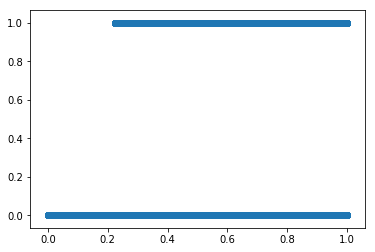

In [34]:

import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

warnings.filterwarnings(action="ignore")


data=pd.read_csv("./data/bmi/bmi.csv" , sep="," , skiprows = 3) #sep 는 csv가 ,로 구분되어있어서 defalt 값??
       #결치값 제거

data = data.dropna(how="any")

df_x = data[["height","weight"]]
df_y = data["label"]
df_x2=df_x

# df_y 를 분류해야함 100  010 001 , 0 1 2

y_data=tf.one_hot(df_y , 3)

sess=tf.Session()
y_data = sess.run(y_data)

#print(sess.run(y_data)) = minmax 한거랑 똑같
scaler= MinMaxScaler()
x_data = scaler.fit_transform(df_x.values)

print(df_x.loc[0])


print(x_data[:,:1])
print(y_data[:,:1])
plt.scatter(x_data[:,:1],y_data[:,:1])
plt.show()


Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
cost: 1.9363421201705933
cost: 0.9512214660644531
cost: 0.6556088328361511
cost: 0.8562511205673218
cost: 0.3121143877506256
cost: 0.5650436282157898
cost: 0.6213122606277466
cost: 0.41575005650520325
cost: 0.5824372172355652
cost: 0.46996399760246277
정확도:0.900600016117096


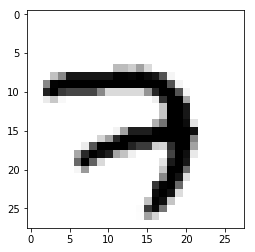

In [30]:
#mnist 숫자 알아내는 것 
#입력데이터 0~9         4   28픽셀 , 28픽셀   픽셀데이터 

#y축데이터 -> 어떤숫자인지 표시 10개 중 1개
#입력데이터 -> 픽셀 값  x축 값 700여개
#원래 이미지 데이터는 3차원 데이터를 흑백 -> 2차원 데이터를 다시 1차원으로 변환
# 약 5만 5천개의 이미지를 입력

# x 파라미터 shape => 55000 , (28*28) (784개) 트레이닝 데이터
# y측 레이블의 shape 55000 , 10


from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


#데이터 로딩

mnist = input_data.read_data_sets("./data/mnist", one_hot=True) #학습용으로 나온 데이터고 그냥 읽어내면됨
#원핫 처리없이 기본 데이터가 원핫으로 처리되어서 나옴 즉 데이터 전처리가 불필요

#mnist.train.num_examples

plt.imshow(mnist.train.images[0].reshape(28,28),cmap="Greys",interpolation="nearest"  )

#interpolation 뭔뜻?  2차배열로 바꿈 원래 이미지형태로


sess=tf.Session()
#sess.run(tf.argmax(mnist.train.labels[0]) #1차 배열을 2차배열로 만들어야 argmax 됨




#2.placeholder

X=tf.placeholder(shape=[None,784],dtype=tf.float32 )
Y=tf.placeholder(shape=[None,10],dtype=tf.float32 )


#3.weight

W=tf.Variable(tf.random_normal([784,10]), name="weight" )
b=tf.Variable(tf.random_normal([10]), name="bias"  )


logit=tf.matmul(X,W)+b
H=tf.nn.softmax(logit)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2( logits=logit , labels=Y ))

train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

batch_size=100
train_epoch=30
avg_cost = 0

for step in range(train_epoch):
    num_of_iter=int(mnist.train.num_examples/batch_size)
    
    
    for i in range(num_of_iter):
        batch_x , batch_y = mnist.train.next_batch(batch_size)
        
        _,cost_val=sess.run([train,cost],feed_dict={X:batch_x,Y:batch_y})

       # avg_cost = (cost_val / num_of_iter)
    if step%3 == 0:
        print("cost: {}".format(cost_val))
       # print("full cost:{}".format(avg_cost))
        
#acuracy

predict = tf.argmax(H,1)
correct=tf.equal(predict , tf.argmax(Y,1)) 

accuracy=tf.reduce_mean(tf.cast(correct , dtype=tf.float32))






print("정확도:{}".format(sess.run(accuracy, feed_dict={X:mnist.test.images,Y:mnist.test.labels})) )

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
55000


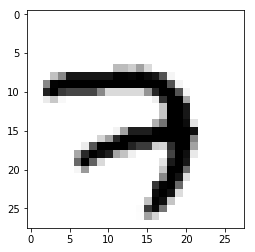

In [63]:
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


#데이터 로딩

mnist = input_data.read_data_sets("./data/mnist", one_hot=True) #학습용으로 나온 데이터고 그냥 읽어내면됨
#원핫 처리없이 기본 데이터가 원핫으로 처리되어서 나옴 즉 데이터 전처리가 불필요

#mnist.train.num_examples

plt.imshow(mnist.train.images[0].reshape(28,28),cmap="Greys",interpolation="nearest"  )

#interpolation 뭔뜻?  2차배열로 바꿈 원래 이미지형태로


sess=tf.Session()
#sess.run(tf.argmax(mnist.train.labels[0]) #1차 배열을 2차배열로 만들어야 argmax 됨




#2.placeholder

X=tf.placeholder(shape=[None,784],dtype=tf.float32 )
Y=tf.placeholder(shape=[None,10],dtype=tf.float32 )


#3.weight

W=tf.Variable(tf.random_normal([784,10]), name="weight" )
b=tf.Variable(tf.random_normal([10]), name="bias"  )


logit=tf.matmul(X,W)+b
H=tf.nn.softmax(logit)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2( logits=logit , labels=Y ))

train = tf.train.GradientDescentOptimizer(learning_rate=1).minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

batch_size=100
train_epoch=30

print("============")
print(mnist.train.num_examples)
# for step in range(train_epoch):
#     num_of_iter=int(mnist.train.num_examples/batch_size)
    
    
#     for i in range(num_of_iter):
#         batch_x , batch_y = mnist.train.next_batch(batch_size)
        
#         _,cost_val=sess.run([train,cost],feed_dict={X:batch_x,Y:batch_y})

        
#     if step%3 == 0:
#         print("cost: {}".format(cost_val))
        
# #acuracy

# predict = tf.argmax(H,1)
# correct=tf.equal(predict , tf.argmax(Y,1)) 

# accuracy=tf.reduce_mean(tf.cast(correct , dtype=tf.float32))

# print("정확도:{}".format(sess.run(accuracy, feed_dict={X:mnist.test.images,Y:mnist.test.labels})) )